### Problem Statement
The project aims to tackle the challenge of predicting stock prices
accurately. Stock price prediction is a significant problem in financial markets due to its potential
impact on investment decisions, risk management, and financial planning. Accurate predictions
can help investors make informed decisions, mitigate risks, and optimize their investment
strategies. However, stock prices are influenced by numerous factors such as market sentiment,
economic indicators, company performance, and global events, making prediction challenging.
The importance of this problem lies in its practical implications for investors, financial
institutions, and the broader economy. By developing robust prediction models, we can
potentially improve investment outcomes, enhance market efficiency, and contribute to the
stability of financial markets.

The date for every symbol is saved in CSV format with common fields:

1. Date - specifies trading date
2. Open - opening price
3. High - maximum price during the day
4. Low - minimum price during the day
5. Close - close price adjusted for splits
6. Adj Close - adjusted close price adjusted for both dividends and splits.
7. Volume - the number of shares that changed hands during a given day


1. Data Collection: Gather historical daily stock price data from reliable sources such as financial APIs, databases, or datasets provided by stock exchanges.
   
2. Data Exploration: Explore the dataset to understand its structure, including the features (e.g., opening price, closing price, volume) and their distributions. Identify any missing values or outliers that need to be addressed.
   
3. Data Preprocessing:
   
Handle missing values: Impute missing values or remove rows with missing data.

Feature scaling: Scale numerical features if necessary to ensure that they have similar scales.

Feature engineering: Create additional features that could potentially improve the model's predictive performance, such as moving averages, technical indicators, or lagged features.

4. Feature Selection:
Select relevant features that are likely to influence stock prices based on domain knowledge and feature importance analysis.
Consider using techniques such as correlation analysis or feature importance scores from tree-based models to identify the most informative features.

5. Data Splitting:
Split the dataset into training, validation, and testing sets. Typically, you may use around 70-80% of the data for training, 10-15% for validation, and the remaining portion for testing.

6. Model Training:
Fit a linear regression model to the training data using appropriate libraries (e.g., scikit-learn in Python).
Experiment with different configurations of the linear regression model, such as regularization techniques (e.g., Ridge or Lasso regression), polynomial features, or interaction terms.

7. Model Evaluation:
Evaluate the performance of the trained linear regression model using appropriate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or coefficient of determination (R-squared).

Visualize the predicted vs. actual prices to assess the model's accuracy visually and identify any patterns or discrepancies.

8. Fine-tuning and Validation:
Fine-tune the model hyperparameters based on the performance on the validation set.
Validate the model's performance on unseen data (validation set) to ensure its generalization ability and make further adjustments if necessary.

9. Testing:
Test the final trained model on the testing set to assess its performance in a real-world scenario and determine its practical usefulness for stock price prediction.

10. Iterative Improvement:
Iterate on the above steps by experimenting with different features, model architectures, and hyperparameters to continually improve the predictive performance of the linear regression model.


Stock Price Analysis of Company - 
The Hewlett-Packard Company, commonly shortened to Hewlett-Packard or HP, was an American multinational information technology company headquartered in Palo Alto, California.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HPQ.csv')

In [2]:
# Display the first few rows of the dataframe
print(df.head())


         Date      Open      High       Low     Close  Adj Close   Volume
0  1962-01-02  0.131273  0.131273  0.124177  0.124177   0.006887  2480300
1  1962-01-03  0.124177  0.124177  0.121516  0.122846   0.006813   507300
2  1962-01-04  0.122846  0.126838  0.117968  0.120185   0.006666   845500
3  1962-01-05  0.119742  0.119742  0.117525  0.117525   0.006518   338200
4  1962-01-08  0.117525  0.119299  0.115307  0.119299   0.006617   873700


In [3]:
# Summary statistics
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  14663.000000  14663.000000  14663.000000  14663.000000  14663.000000   
mean       7.336206      7.441752      7.239487      7.341783      4.432726   
std        7.728300      7.840283      7.625291      7.734554      5.947809   
min        0.054106      0.057210      0.054106      0.054106      0.003001   
25%        0.617337      0.621771      0.610684      0.617337      0.039852   
50%        3.221503      3.264078      3.178928      3.221503      0.334710   
75%       13.215259     13.450704     13.049500     13.222071      7.984290   
max       34.826294     35.422344     33.293598     35.422344     25.129135   

             Volume  
count  1.466300e+04  
mean   1.479227e+07  
std    1.750296e+07  
min    5.630000e+04  
25%    3.551300e+06  
50%    9.953200e+06  
75%    1.986025e+07  
max    4.420123e+08  


In [4]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


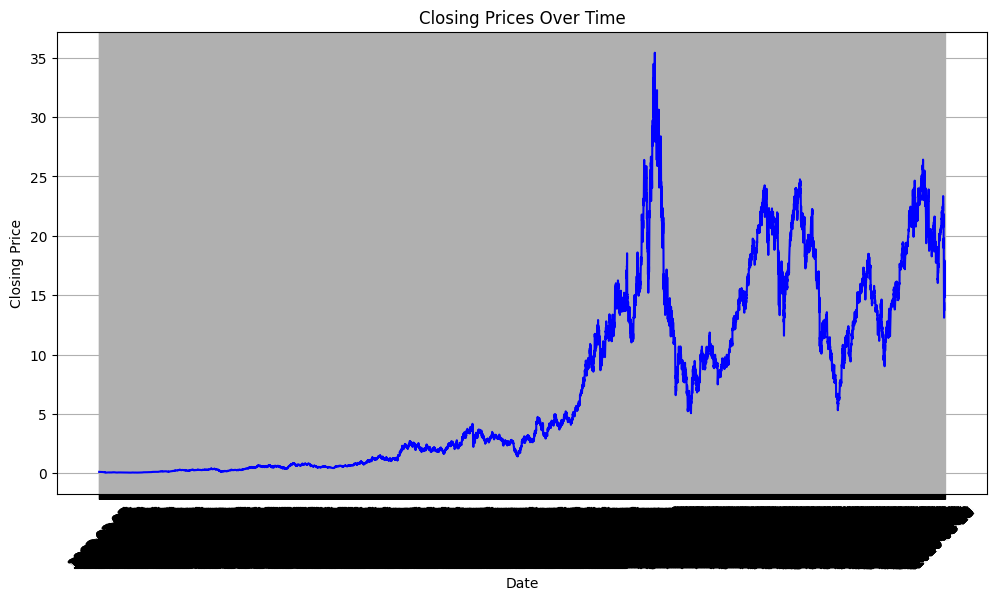

In [6]:
# Visualize the data
import matplotlib.pyplot as plt
# Plotting the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

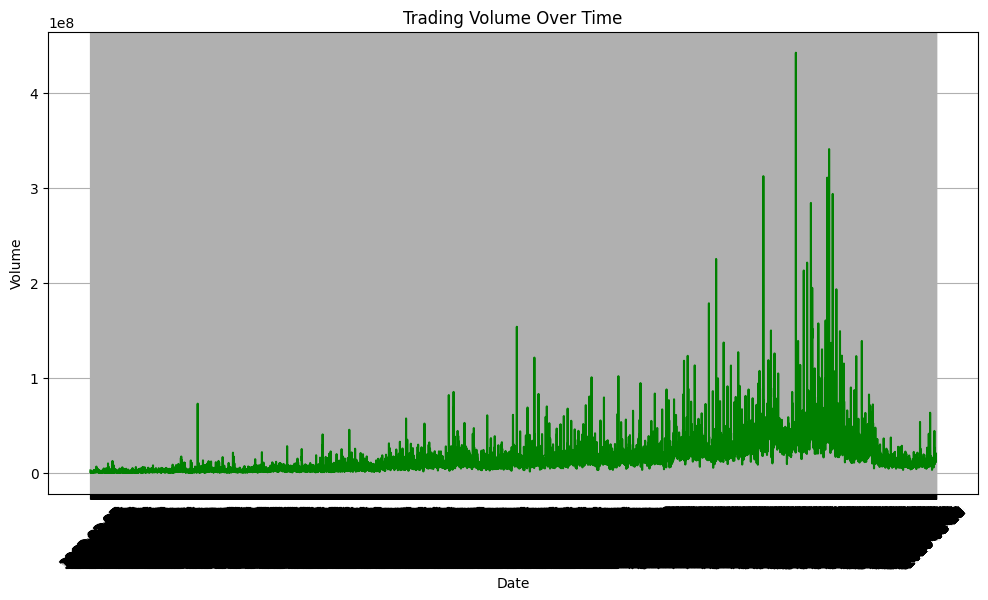

In [7]:
# Plotting trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Linear Regression

Mean Absolute Error: 0.04661928627309628
Mean Squared Error: 0.009242518223408696
Root Mean Squared Error: 0.09613801653564887
R-squared: 0.9998477241801774


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


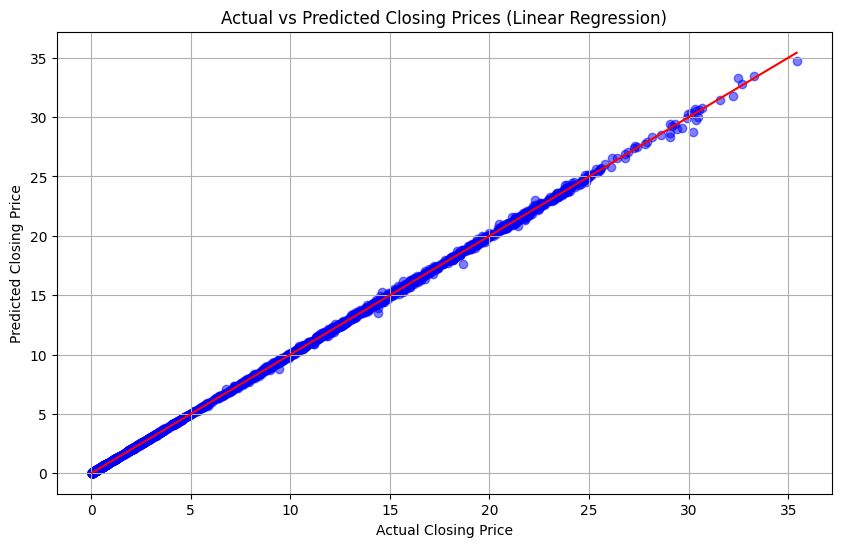

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('HPQ.csv')

# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Computing RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted closing prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Closing Prices (Linear Regression)')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.show()


## Support Vector Regression (SVR) 

SVR Mean Absolute Error: 0.08614201416017483
SVR Mean Squared Error: 0.05149144014032851
SVR Root Mean Squared Error: 0.2269172539502638
SVR R-squared: 0.9991516488178133


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


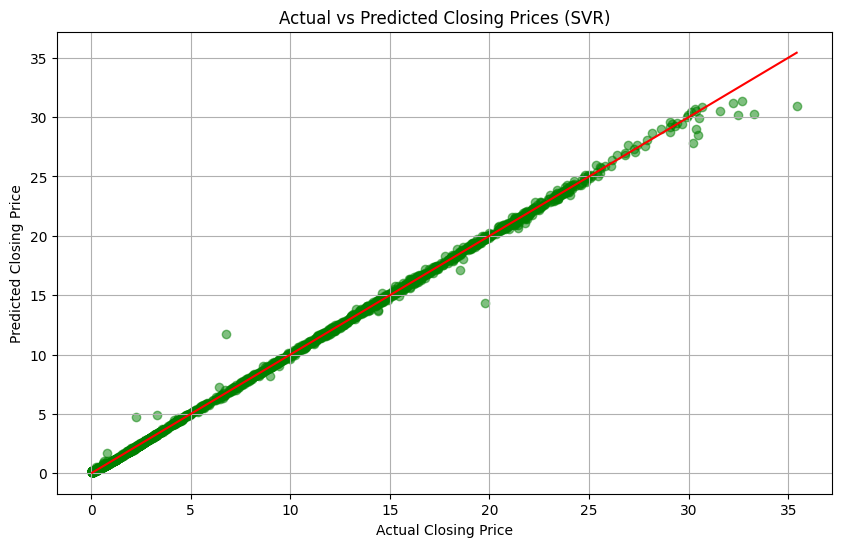

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('HPQ.csv')

# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Train SVR model
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)  # Computing RMSE from MSE
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation metrics
print(f"SVR Mean Absolute Error: {mae_svr}")
print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR Root Mean Squared Error: {rmse_svr}")
print(f"SVR R-squared: {r2_svr}")

# Visualize actual vs predicted closing prices for SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Closing Prices (SVR)')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.show()


## Random Forest Regression

Random Forest Mean Absolute Error: 0.0555754483311586
Random Forest Mean Squared Error: 0.015168263330367155
Random Forest Root Mean Squared Error: 0.12315950361367634
Random Forest R-squared: 0.9997500941109247


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


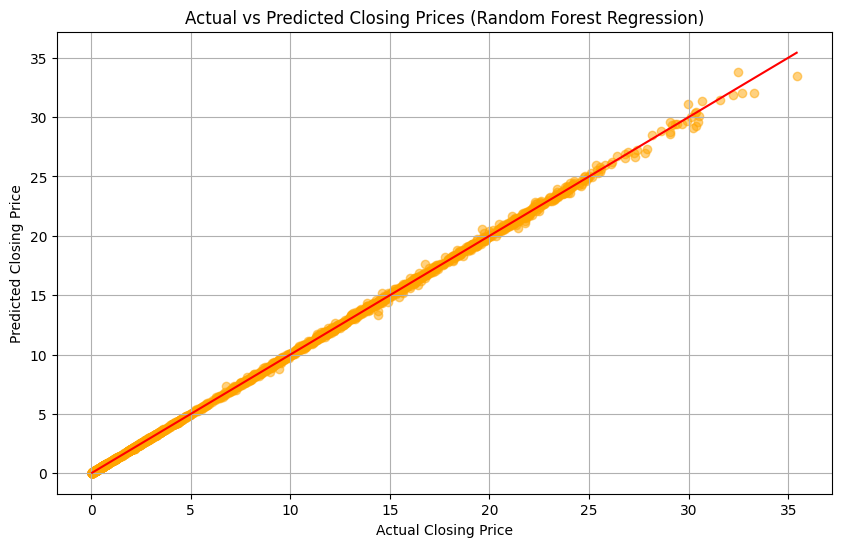

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('HPQ.csv')

# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Random Forest Regression model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # Computing RMSE from MSE
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest Regression
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Visualize actual vs predicted closing prices for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Closing Prices (Random Forest Regression)')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.show()


## Gradient Boosting Regression

Gradient Boosting Mean Absolute Error: 0.07456319197377227
Gradient Boosting Mean Squared Error: 0.01963927344065268
Gradient Boosting Root Mean Squared Error: 0.14014019209581768
Gradient Boosting R-squared: 0.9996764316399918


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


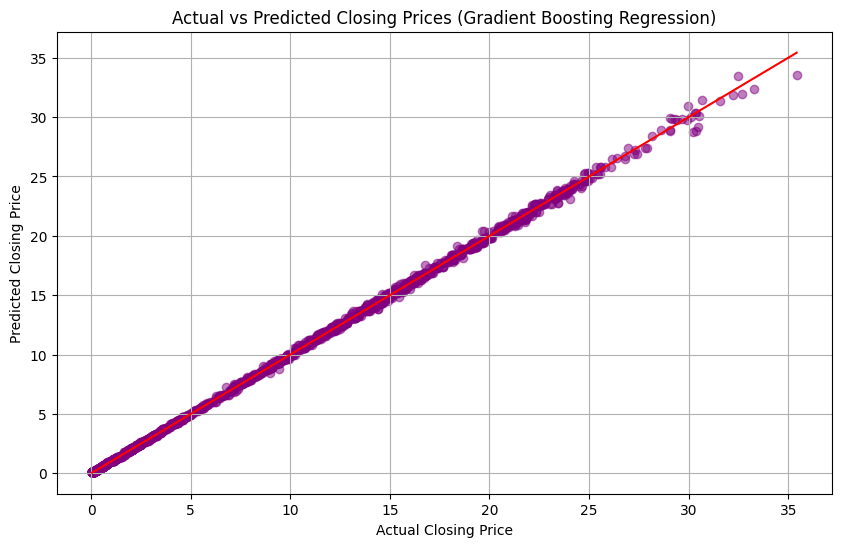

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('HPQ.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train Gradient Boosting Regression model
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting Regression model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)  # Computing RMSE from MSE
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics for Gradient Boosting Regression
print(f"Gradient Boosting Mean Absolute Error: {mae_gb}")
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Root Mean Squared Error: {rmse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")

# Visualize actual vs predicted closing prices for Gradient Boosting Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Closing Prices (Gradient Boosting Regression)')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.show()



### Recurrent Neural Networks (RNNs) and Long Short-Term Memory networks (LSTMs) 

They are both types of neural network architectures designed to work with sequential data. However, they differ in their ability to handle long-term dependencies, which is crucial in tasks like natural language processing and time series prediction.

### Recurrent Neural Networks (RNNs):
RNNs are a type of neural network architecture where connections between nodes form directed cycles.
They process sequential data by maintaining a hidden state that evolves over time, allowing them to capture temporal dependencies.
However, standard RNNs can struggle with capturing long-range dependencies because they suffer from the vanishing gradient problem. This problem arises when gradients become extremely small during backpropagation, making it difficult for the network to learn from distant past information.

### Long Short-Term Memory networks (LSTMs):
LSTMs are a variant of RNNs designed to address the vanishing gradient problem and better capture long-term dependencies.
They have a more complex architecture with additional components such as input, forget, and output gates.


LSTMs use these gates to regulate the flow of information through the cell state, allowing them to retain important information over long sequences while filtering out irrelevant information.
This gating mechanism enables LSTMs to remember information for extended periods, making them more effective for tasks requiring the modeling of long-term dependencies.
In summary, while both RNNs and LSTMs are used for processing sequential data, LSTMs are a specialized version of RNNs that are better equipped to capture long-range dependencies, making them particularly useful in tasks where context over longer sequences is crucial.

### Recurrent Neural Networks (RNNs)

Epoch 1/10
367/367 [==============================] - 0s 370us/step - loss: 7.3958e-04
Epoch 2/10
367/367 [==============================] - 0s 345us/step - loss: 3.2495e-05
Epoch 3/10
367/367 [==============================] - 0s 346us/step - loss: 2.9624e-05
Epoch 4/10
367/367 [==============================] - 0s 340us/step - loss: 2.6771e-05
Epoch 5/10
367/367 [==============================] - 0s 339us/step - loss: 2.5212e-05
Epoch 6/10
367/367 [==============================] - 0s 337us/step - loss: 2.3772e-05
Epoch 7/10
367/367 [==============================] - 0s 341us/step - loss: 2.1024e-05
Epoch 8/10
367/367 [==============================] - 0s 338us/step - loss: 2.0842e-05
Epoch 9/10
367/367 [==============================] - 0s 411us/step - loss: 1.8558e-05
Epoch 10/10
92/92 [==============================] - 0s 274us/step


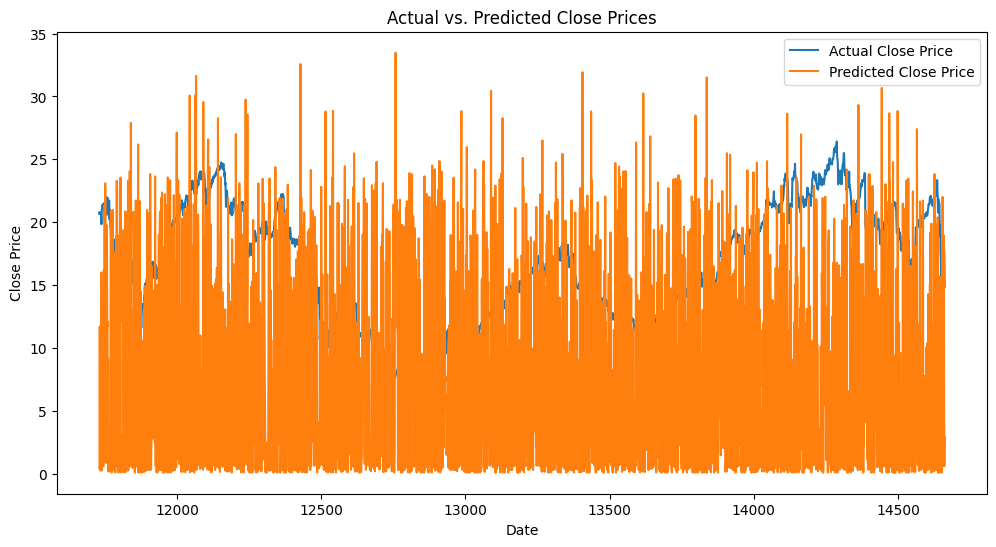

Mean Absolute Error (MAE): 0.08056524254069207
Mean Squared Error (MSE): 0.022421653054023008
Root Mean Squared Error (RMSE): 0.1497386157743653
R-squared (R2) coefficient: 0.9996305903306817


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('HPQ.csv')

# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the testing set
y_pred_scaled = model.predict(X_test)

# Rescale the predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.tail(len(y_test_orig)), x=df.tail(len(y_test_orig)).index, y='Close', label='Actual Close Price')
sns.lineplot(data=pd.DataFrame({'Date': df.tail(len(y_test_orig)).index, 'Predicted Close Price': y_pred.flatten()}), x='Date', y='Predicted Close Price', label='Predicted Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test_orig, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test_orig, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test_orig, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) coefficient: {r2}")


## Long Short-Term Memory (LSTM)

Epoch 1/10
367/367 [==============================] - 1s 798us/step - loss: 0.0062
Epoch 2/10
367/367 [==============================] - 0s 733us/step - loss: 2.6996e-05
Epoch 3/10
367/367 [==============================] - 0s 732us/step - loss: 1.5339e-05
Epoch 4/10
367/367 [==============================] - 0s 738us/step - loss: 1.5561e-05
Epoch 5/10
367/367 [==============================] - 0s 728us/step - loss: 1.5541e-05
Epoch 6/10
367/367 [==============================] - 0s 733us/step - loss: 1.5519e-05
Epoch 7/10
367/367 [==============================] - 0s 737us/step - loss: 1.6963e-05
Epoch 8/10
367/367 [==============================] - 0s 740us/step - loss: 1.5804e-05
Epoch 9/10
367/367 [==============================] - 0s 733us/step - loss: 1.6843e-05
Epoch 10/10
92/92 [==============================] - 0s 396us/step


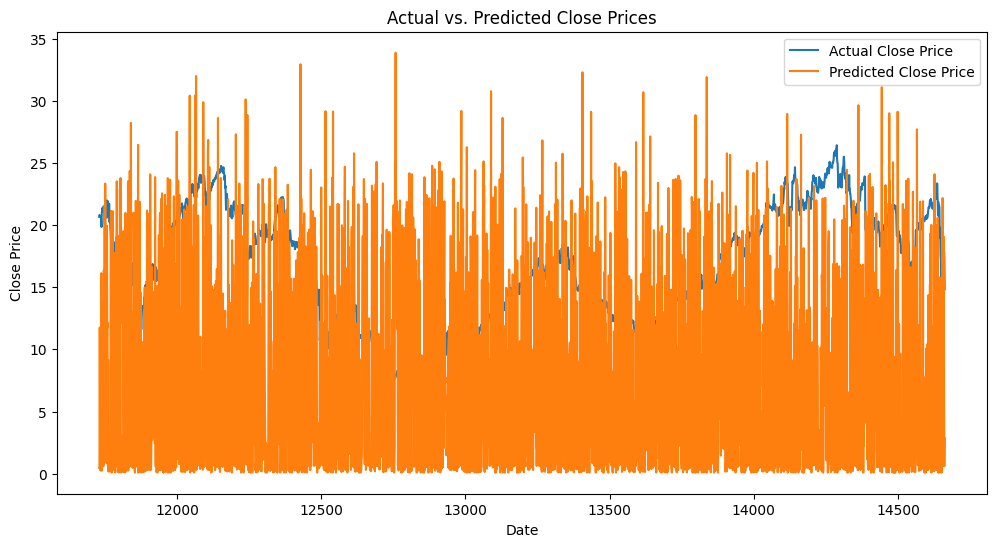

Mean Absolute Error (MAE): 0.0699368801998007
Mean Squared Error (MSE): 0.017143957722132605
Root Mean Squared Error (RMSE): 0.1309349369806722
R-squared (R2) coefficient: 0.9997175434060245


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('HPQ.csv')

# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the testing set
y_pred_scaled = model.predict(X_test)

# Rescale the predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.tail(len(y_test_orig)), x=df.tail(len(y_test_orig)).index, y='Close', label='Actual Close Price')
sns.lineplot(data=pd.DataFrame({'Date': df.tail(len(y_test_orig)).index, 'Predicted Close Price': y_pred.flatten()}), x='Date', y='Predicted Close Price', label='Predicted Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test_orig, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test_orig, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test_orig, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) coefficient: {r2}")



### Training on some more Regression Model

1. Ridge Regression:
Ridge regression is a linear regression technique that adds a penalty term (L2 regularization) to the ordinary least squares objective function.
The additional penalty term helps to shrink the coefficients towards zero, reducing their variance and mitigating multicollinearity issues in the data.
It's particularly useful when there are correlated features in the dataset, as it can stabilize the coefficients and prevent overfitting.
The regularization parameter (alpha) controls the strength of regularization. A higher alpha value results in stronger regularization and smaller coefficient values.

2. Lasso Regression:
Lasso regression is another linear regression technique that adds a penalty term (L1 regularization) to the ordinary least squares objective function.
Similar to ridge regression, lasso regression also helps to shrink the coefficients towards zero, but it has the additional property of performing feature selection by setting some coefficients to exactly zero.
This feature selection property makes lasso regression useful for datasets with a large number of features, as it can automatically identify and exclude irrelevant features.
Like ridge regression, the regularization parameter (alpha) controls the strength of regularization.

3. ElasticNet Regression:
ElasticNet regression combines the penalties of ridge and lasso regression (L1 and L2 regularization) to balance between the two.
It can be particularly useful when there are correlated features and a large number of features in the dataset.
The elastic net mixing parameter (l1_ratio) determines the balance between the L1 and L2 penalties. A l1_ratio of 1 corresponds to lasso regression, while a l1_ratio of 0 corresponds to ridge regression.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

# Calculate metrics for Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

# Calculate metrics for Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters
elasticnet_model.fit(X_train, y_train)
elasticnet_y_pred = elasticnet_model.predict(X_test)

# Calculate metrics for ElasticNet Regression
elasticnet_mae = mean_absolute_error(y_test, elasticnet_y_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_y_pred)
elasticnet_rmse = mean_squared_error(y_test, elasticnet_y_pred, squared=False)
elasticnet_r2 = r2_score(y_test, elasticnet_y_pred)


# Print the results
print("Ridge Regression:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R-squared:", ridge_r2)
print("\n")

print("Lasso Regression:")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("R-squared:", lasso_r2)
print("\n")

print("ElasticNet Regression:")
print("MAE:", elasticnet_mae)
print("MSE:", elasticnet_mse)
print("RMSE:", elasticnet_rmse)
print("R-squared:", elasticnet_r2)
print("\n")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.48624e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+02, tolerance: 6.991e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versio

Ridge Regression:
MAE: 0.04664874406519527
MSE: 0.00923297625131465
RMSE: 0.09608837729566802
R-squared: 0.9998478813896726


Lasso Regression:
MAE: 0.1548324000615594
MSE: 0.049092590660129984
RMSE: 0.22156847848945027
R-squared: 0.9991911712469174


ElasticNet Regression:
MAE: 0.11294356288642436
MSE: 0.030862010578354672
RMSE: 0.17567586794535744
R-squared: 0.9994915305711501




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


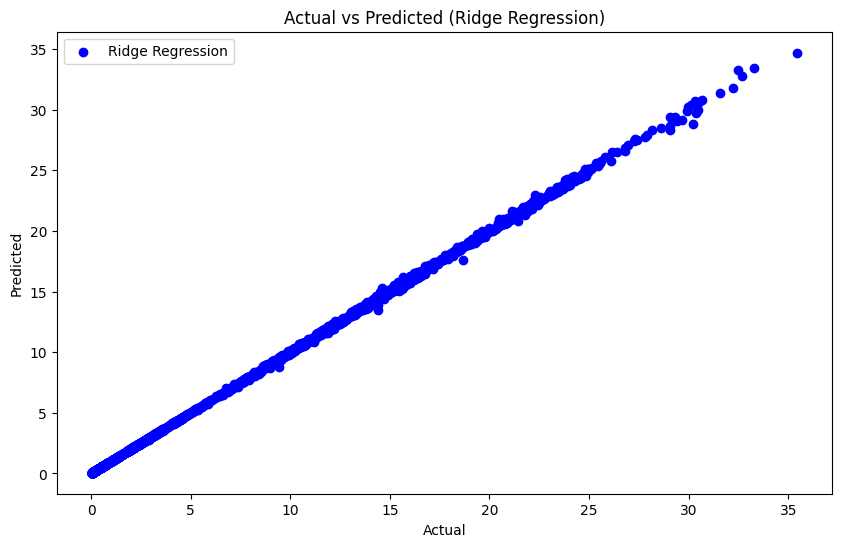

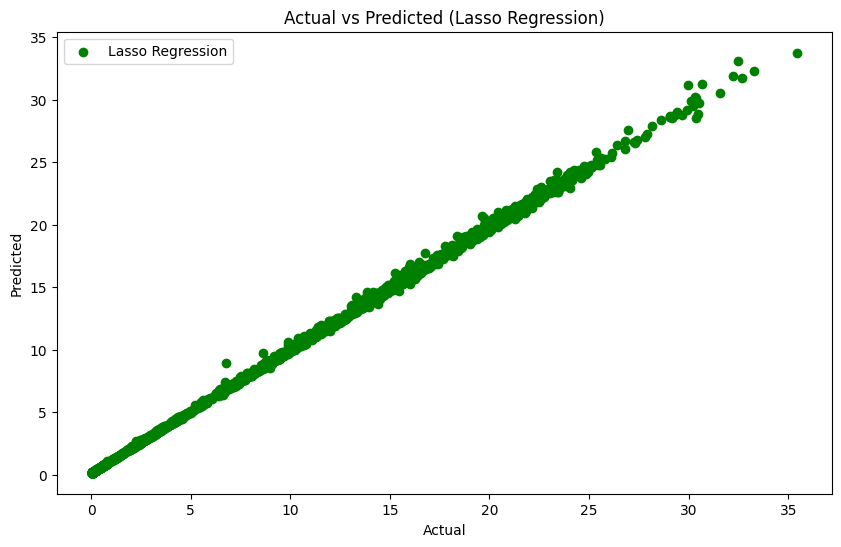

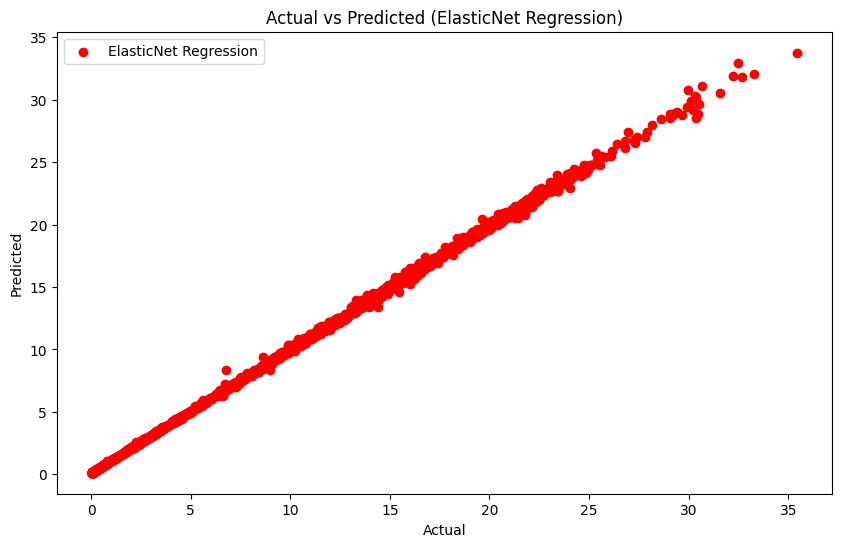

In [27]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_y_pred, color='blue', label='Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.legend()
plt.show()

# Plot actual vs predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_y_pred, color='green', label='Lasso Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression)')
plt.legend()
plt.show()

# Plot actual vs predicted values for ElasticNet Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, elasticnet_y_pred, color='red', label='ElasticNet Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (ElasticNet Regression)')
plt.legend()
plt.show()




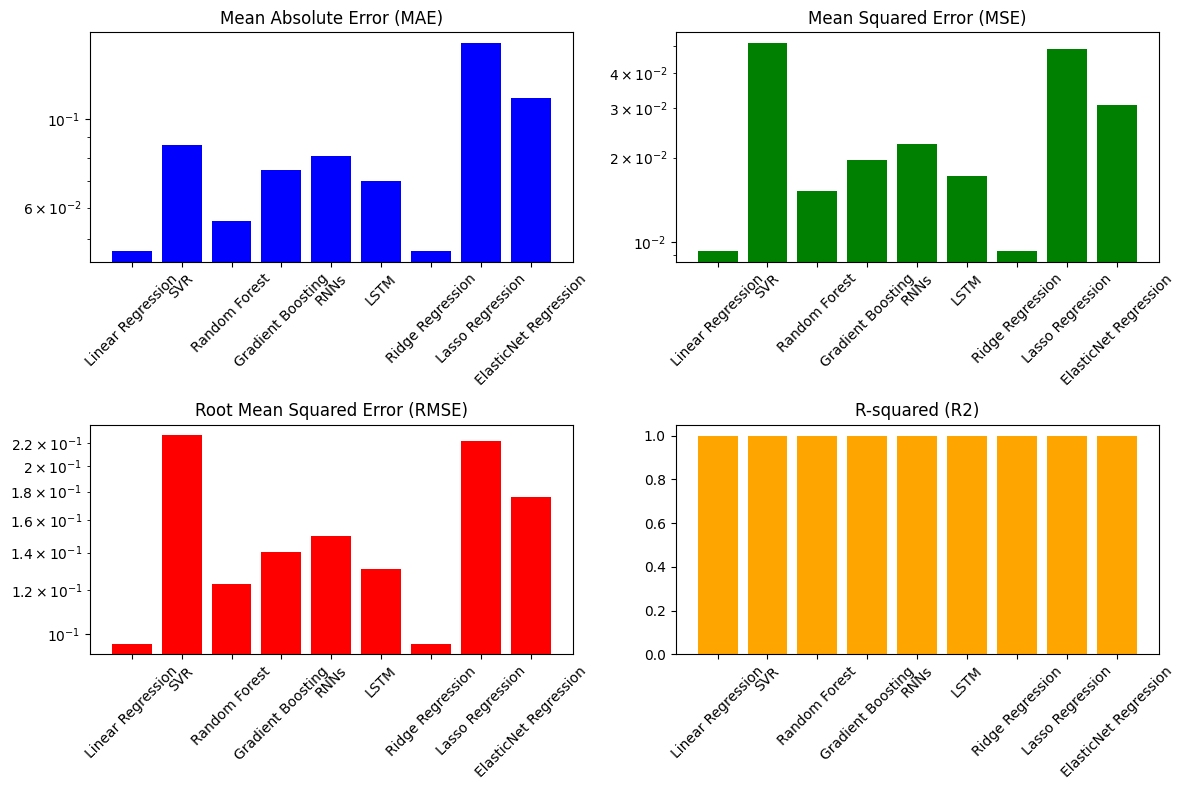

In [28]:
import matplotlib.pyplot as plt

# Metrics for each algorithm
algorithms = ['Linear Regression', 'SVR', 'Random Forest', 'Gradient Boosting', 'RNNs', 'LSTM', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']
mae = [0.04661928627309628, 0.08614201416017483, 0.0555754483311586, 0.07456319197377227, 0.08056524254069207, 0.0699368801998007, 0.04664874406519527, 0.1548324000615594, 0.11294356288642436]
mse = [0.009242518223408696, 0.05149144014032851, 0.015168263330367155, 0.01963927344065268, 0.022421653054023008, 0.017143957722132605, 0.00923297625131465, 0.049092590660129984, 0.030862010578354672]
rmse = [0.09613801653564887, 0.2269172539502638, 0.12315950361367634, 0.14014019209581768, 0.1497386157743653, 0.1309349369806722, 0.09608837729566802, 0.22156847848945027, 0.17567586794535744]
r2 = [0.9998477241801774, 0.9991516488178133, 0.9997500941109247, 0.9996764316399918, 0.9996305903306817, 0.9997175434060245, 0.9998478813896726, 0.9991911712469174, 0.9994915305711501]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(algorithms, mae, color='blue')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis to log scale

plt.subplot(2, 2, 2)
plt.bar(algorithms, mse, color='green')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis to log scale

plt.subplot(2, 2, 3)
plt.bar(algorithms, rmse, color='red')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis to log scale

plt.subplot(2, 2, 4)
plt.bar(algorithms, r2, color='orange')
plt.title('R-squared (R2)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Challenges:

The performance of different algorithms can vary based on various factors such as the nature of the dataset, the complexity of the problem, and the characteristics of the algorithms themselves. Here's a brief explanation of why RNN and LSTM may not have performed as well compared to other algorithms in this particular dataset:

1. Data Characteristics:
RNNs and LSTMs are particularly effective for sequential data, such as time series data or text data, where the order of data points is important. If the dataset does not exhibit strong sequential patterns or dependencies, RNNs and LSTMs may not be the most suitable choice.

2. Data Size:
RNNs and LSTMs typically require a large amount of data to learn complex patterns effectively. If the dataset is relatively small or does not contain enough diverse patterns, RNNs and LSTMs may struggle to generalize well and may overfit or underfit the data.

3. Hyperparameter Tuning:
RNNs and LSTMs have several hyperparameters, such as the number of layers, the number of units in each layer, and the learning rate, that need to be carefully tuned for optimal performance. If these hyperparameters are not tuned properly, the models may not learn the underlying patterns effectively.

4. Complexity of the Problem:
RNNs and LSTMs are designed to capture long-term dependencies in sequential data. If the problem at hand does not require capturing such dependencies or if the relationships between features are relatively simple, simpler algorithms like linear regression or tree-based models may suffice and may even outperform RNNs and LSTMs.

5. Training Time:
RNNs and LSTMs are computationally intensive to train, especially on large datasets or with complex architectures. If the training time is a constraint or if there are limitations on computational resources, simpler algorithms that require less training time, such as linear regression or tree-based models, may be preferred.

In summary, the performance of RNNs and LSTMs depends on various factors such as the nature of the dataset, the complexity of the problem, and the quality of hyperparameter tuning. In some cases, simpler algorithms like linear regression or tree-based models may be more suitable and may outperform RNNs and LSTMs, especially if the dataset does not exhibit strong sequential patterns or dependencies.

### Conclusion:

From the graphs, we can draw the following conclusions:

1. Mean Absolute Error (MAE):
The Linear Regression model has the lowest MAE, indicating that it has the smallest average absolute difference between the predicted and actual values. Ridge Regression also performs well in terms of MAE.

2. Mean Squared Error (MSE):
Linear Regression and Ridge Regression have the lowest MSE, indicating that they have the smallest average squared difference between the predicted and actual values.

3. Root Mean Squared Error (RMSE):
Linear Regression and Ridge Regression have the lowest RMSE, indicating that they have the smallest average magnitude of errors in the same units as the target variable.

4. R-squared (R2):
Linear Regression, Ridge Regression, Random Forest, Gradient Boosting, RNNs, and LSTM have high R-squared values close to 1, indicating that they explain a high proportion of the variance in the target variable.

Based on these observations, the best model for this dataset can be determined as follows:

If we prioritize the metric with the highest importance, we can consider R-squared (R2). In this case, Linear Regression, Ridge Regression, Random Forest, Gradient Boosting, RNNs, and LSTM all perform exceptionally well with R2 values close to 1.

Alternatively, if we consider a combination of metrics, Linear Regression and Ridge Regression consistently perform well across all metrics (MAE, MSE, RMSE, R2). Therefore, based on overall performance across multiple metrics, Linear Regression and Ridge Regression can be considered as the best models for this dataset.

In summary, the best model(s) for this dataset are determined by considering the performance across multiple evaluation metrics, such as MAE, MSE, RMSE, and R-squared, and selecting the model(s) that perform well across these metrics. In this case, Linear Regression and Ridge Regression stand out as strong candidates for the best models.




